In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from skimage import io, filters, feature, img_as_float, img_as_ubyte
import skimage
import matplotlib.pyplot as plt
import cv2
import numpy as np
import imutils

In [97]:
img = io.imread('/content/drive/MyDrive/71254_2023/01_Lectures/Class07/images/tomato.jpg')# Load Aruco detector

parameters = cv2.aruco.DetectorParameters_create()
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_5X5_50)
        # Get Aruco marker
corners, _, _ = cv2.aruco.detectMarkers(img, aruco_dict, parameters=parameters)
        # Draw polygon around the marker
int_corners = np.int0(corners)
cv2.polylines(img, int_corners, True, (0, 255, 0), 0)

        # Aruco Area
aruco_area = cv2.contourArea (corners[0])

cv2.fillPoly(img, pts =[int_corners[0][0]], color=(0,0,0))
        # Pixel to cm ratio
pixel_cm_ratio = 5*5 / aruco_area# since the AruCo is 5*5 cm, so we devide 25 cm*cm by the number of pixels

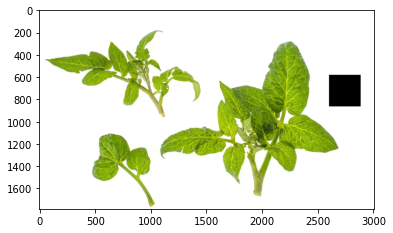

In [98]:
plt.imshow(img)

In [99]:
# Convert MxNx3 image into Kx3 where K=MxN
pixel_values  = img.reshape((-1,3))  #-1 reshape means, in this case, MxN

#We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV
pixel_values = np.float32(pixel_values)

In [100]:
img.reshape((-1,3)).shape # 602 * 900 = 541800

(5366272, 3)

In [101]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [102]:
# number of clusters (K)
k = 3

In [103]:
attempts = 10
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

In [105]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [106]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

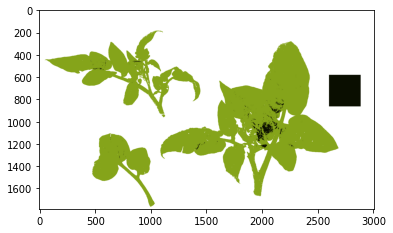

In [107]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(img.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

In [108]:
print(centers)


[[255 255 255]
 [ 10  14   0]
 [133 164  26]]


In [109]:
lst = list(np.median(centers,axis = 0))

In [110]:
result_1 = [int(item) for item in lst]


In [111]:
for i,center in enumerate(centers):
  if np.all(center == (result_1)):
    grass_center_index = i
    print(grass_center_index)

2


In [112]:
# copy source img
masked_image = img.copy()

# convert to the shape of a vector of pixel values (like suits for kmeans)
masked_image = masked_image.reshape((-1, 3))

In [113]:
list_of_cluster_numbers_to_exclude = list(range(k)) # create a list that has the number from 0 to k-1
list_of_cluster_numbers_to_exclude.remove(grass_center_index) # remove the cluster of grass that we want to keep, and not black out
for cluster in list_of_cluster_numbers_to_exclude:
  masked_image[labels== cluster] = [0, 0, 0] # black all clusters except cluster 3

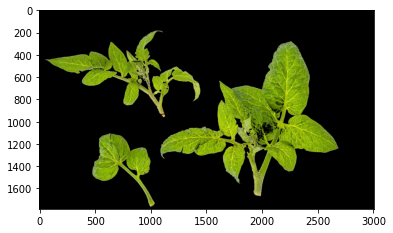

In [114]:
# convert back to original shape
masked_image = masked_image.reshape(img.shape)

# show the image
plt.imshow(masked_image)

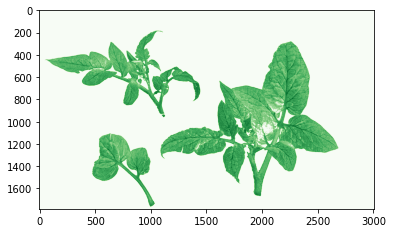

In [115]:
masked_image_grayscale = rgb2gray(masked_image)
plt.imshow(masked_image_grayscale, cmap="Greens")

In [116]:
# count how many pixels are in the foreground and bg
leaf_count = np.sum(np.array(masked_image_grayscale) >0)
bg_count = np.sum(np.array(masked_image_grayscale) ==0)

print('Leaf px count:', leaf_count, 'px')
print('Area:', leaf_count*pixel_cm_ratio, 'cm\N{SUPERSCRIPT TWO},', 'which is:',  f'{0.0001*leaf_count*pixel_cm_ratio:.3f}', 'm\N{SUPERSCRIPT TWO}')

Leaf px count: 1227324 px
Area: 384.4710923990678 cm², which is: 0.038 m²
